# What is Survival Analysis?

## Cohort Analysis
- definition cohort: a group of individuals who share a specified event in a time range (all ncas in 2018, all ncas in the last 30 days, ...)
- useful to
    - tease apart effects of changed business processes (e.g., due date of annual fee for prepaid fallbacks)
    - capture time varying effects (e.g., spent turnover in first month increases over time)
- censoring
    - usually, we do not observe all deaths/cancellations given a considered period (i.e., not all customers cancel their contract within a period of 5 years)
    - we have to make sure that the observation period of an account entered into the analysis is not longer than what can actually be observed
    - we have to take the minimally available observation period if we analyze several accounts
    - we may partition the entities/accounts into cohorts to increase the observation period for sub-groups

<img src="references/survival-trajectories-ncas.png" width="700" />

***References***
- an introduction to survival analysis: https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html
- an introduction to cohort analysis: https://medium.com/analytics-for-humans/a-beginners-guide-to-cohort-analysis-the-most-actionable-and-underrated-report-on-google-c0797d826bf4
- cohort analysis using google analytics and tableau: https://analytics.googleblog.com/2013/03/get-useful-insights-easier-automate.html

# Survival-Cohort Default Notebook

In [1]:
# 15 s
import bcag
from bcag.sql_utils import execute_stored_procedure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from datetime import datetime
import qgrid

In [2]:
import sys
sys.path.append("..")

In [3]:
from utils import survival as s_utils

In [4]:
%load_ext autoreload
%autoreload 1
%aimport utils.survival

In [5]:
sns.set_style("whitegrid")
plt.style.use("seaborn-whitegrid")

## Run SP and Get Data from JEMAS

In [6]:
with open("../sql/define_groups.sql", "r") as f:
    sql_groups = f.read()#.replace("'", "''")

In [7]:
sp_params = dict({
    "dt_start_incl": "2017-01-01",
    "dt_end_incl": "2018-12-31",
    "sql_groups": sql_groups
})

the following cell takes about 35 s to be executed

In [8]:
df_ncas = s_utils.load_survival_data(sp_params)

### Preprocessing

In [9]:
# convert status to categorical dtype
# convert date columns to date dtype and add cohort by year
df_ncas, idx = s_utils.preprocess_df(df_ncas)

In [10]:
colors = ["darkgreen", "mediumseagreen", "turquoise", "dodgerblue", "orange", "tomato", "red"]
status_colors = np.array(colors)[idx].tolist()

## Status by Cohort and Group

In [11]:
df_status_agg, cohorts = s_utils.proportion_by_status(df_ncas)

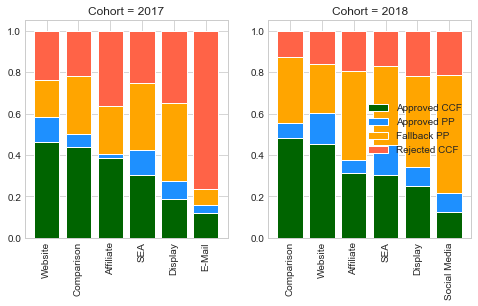

In [12]:
ncols = 2
nrows = int(np.ceil(len(cohorts) / ncols))
f, axs = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 4))
axs = s_utils.plot_status_by_group(df_status_agg, cohorts, status_colors, axs)

In [13]:
qgrid_nca_overview = s_utils.nca_overview(df_status_agg)
qgrid_nca_overview

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Survival

In [14]:
df_survival_agg = s_utils.create_df_survival(df_ncas, 200)

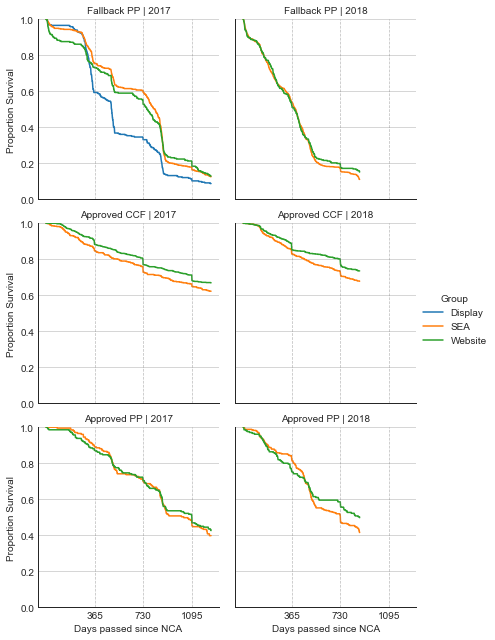

In [15]:
g = s_utils.plot_survival(df_survival_agg)
g

In [16]:
widget_survival = s_utils.survival_overview(df_survival_agg)
widget_survival

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Advanced
- fit a statistical model to the data to answer questions as:
    - What is the probability that an accounts survives x years?
        - given features as cardprofile, demographics, ...
    - What is the expected lifetime on average?
    - Is there a difference in survival between group A and group B?
- python library to try out:
    - lifelines
        - https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html
        - Example:

<img src="references/regime-survival.png" width="400" />